# PCA as a tool for preprocessing and Kernel PCA

This problem sheet explores applications and extensions of PCA. The ﬁrst two exercises deal with PCA as a method for preprocessing and the third one illustrates how to ﬁnd nonlinear structure via kernel PCA.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.spatial.distance
import pandas as pd
from PIL import Image
%matplotlib inline

!python --version

Python 2.7.11 :: Anaconda 4.0.0 (64-bit)


## 4.1 Preprocessing
1. Load the dataset `pca2.csv`. Compte the Principal Components PC1 and PC2 and plot the data in the coordinate system PC1 vs. PC2 - What do you observe?
2. Remove Observations 17 and 157 and redo the first two steps. What is the difference? 

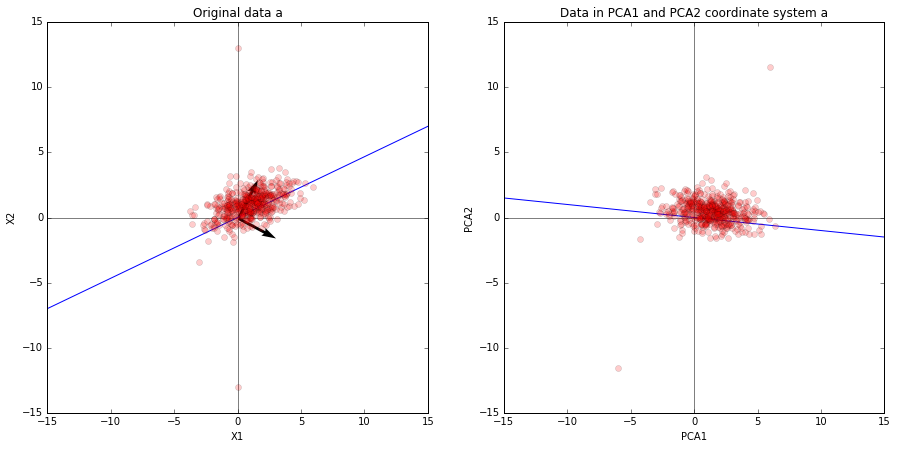

In [3]:
# (a)
pca2 = np.loadtxt(open("pca2.csv"),delimiter=",",skiprows=1)

pca2_centered = pca2 - pca2.mean(0)
cov = np.cov(pca2_centered.T)

# eigen-values and -vectors
values, vectors = np.linalg.eig(cov)

fig = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.axhline(0, color="black", alpha=0.5)
plt.axvline(0, color="black", alpha=0.5)
plt.plot([-15,15],[-7,7])
plt.title("Original data a")
plt.plot(pca2[:,0], pca2[:,1], 'ro', alpha=0.2)
plt.quiver(0,0,vectors[0][0],vectors[0][1],angles='xy',scale_units='xy',scale=0.3)
plt.quiver(0,0,vectors[1][0],vectors[1][1],angles='xy',scale_units='xy',scale=0.3)
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis([-15, 15, -15, 15])

# transform the data into the pcas coordinate system
pca2_data_transormed = np.dot(pca2, vectors)

plt.subplot(1,2,2)
plt.plot([-15,15],[1.5,-1.5])
plt.axhline(0, color="black", alpha=0.5)
plt.axvline(0, color="black", alpha=0.5)
plt.title("Data in PCA1 and PCA2 coordinate system a")
plt.plot(pca2_data_transormed[:,0],pca2_data_transormed[:,1] ,'ro', alpha=0.2)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.axis([-15, 15, -15, 15])

plt.show()

**Observation**: 
```
The original data contains an upwards trend that is similar to the blue line. One would expect that the projected data in a PC1 vs PC2 coordinate system would have that line as roughly the x-axis and therefore the trend of the projected data is parallel to the x-axis. However, the projected data seems to contain a downwards trend (indicated by the blue line). I.e. the transformation "overshot".
```

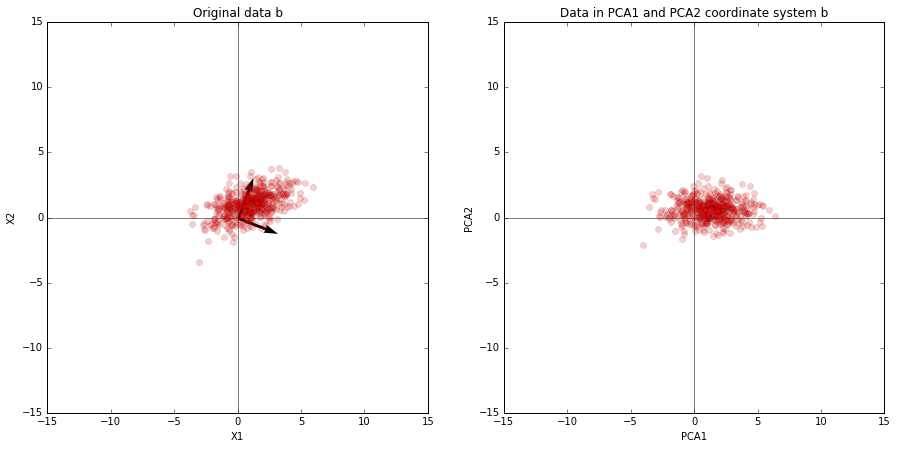

In [4]:
# (a)
pca2 = np.delete(pca2, [16,156],0)

pca2_centered = pca2 - pca2.mean(0)
cov = np.cov(pca2_centered.T)

# eigen-values and -vectors
values2, vectors2 = np.linalg.eig(cov)

fig = plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.axhline(0, color="black", alpha=0.5)
plt.axvline(0, color="black", alpha=0.5)
plt.title("Original data b")
plt.plot(pca2[:,0], pca2[:,1], 'ro', alpha=0.2)
plt.quiver(0,0,vectors2[0][0],vectors2[0][1],angles='xy',scale_units='xy',scale=0.3)
plt.quiver(0,0,vectors2[1][0],vectors2[1][1],angles='xy',scale_units='xy',scale=0.3)
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis([-15, 15, -15, 15])

# tranform data into pcas coordinate system
pca2_data_transormed = np.dot(pca2, vectors2)

x = np.empty([len(pca2), 2])
for i in range (len(pca2)):
    x[i,:]=np.dot(pca2[i,:],vectors2)



plt.subplot(1,2,2)
plt.axhline(0, color="black", alpha=0.5)
plt.axvline(0, color="black", alpha=0.5)
plt.title("Data in PCA1 and PCA2 coordinate system b")
plt.plot(pca2_data_transormed[:,0],pca2_data_transormed[:,1] ,'ro', alpha=0.2)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.axis([-15, 15, -15, 15])

plt.show()

## 4.2 Whitening
1. Load the dataset pca4.csv and check for outliers in the individual variables.
2. Do PCA on a reasonable subset of this data. Use a scree plot to determine how many PCs represent the data well.
3. "Whiten" the data, i.e. create a set of 4 _uncorrelated_ variables with _mean 0_ and _standard deviation equal to 1_. This can be done e.g. using the transformation
$$ Z = X^{~}ED^{-\frac{1}[2]} $$
$\ldots$

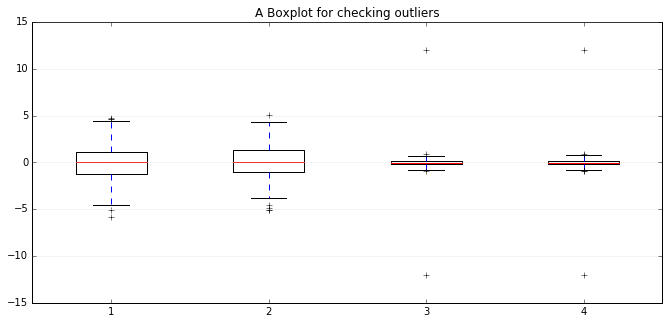

In [5]:
# (a)
pca4 = np.loadtxt(open("pca4.csv"),delimiter=",",skiprows=1)


fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('A Boxplot for checking outliers')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(pca4, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='blue')
plt.setp(bp['fliers'], color='green', marker='+')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)
plt.show()

Interpretation: In X1 and X2 the data is spread out widely. Outliers are still visible according to the boxplots, but there are located very near to the whiskers. We won't treat these values as outliers. In X3 and X4 however, the data is much more dense. Four observations lie far off the rest of the data. These are clearly outliers.

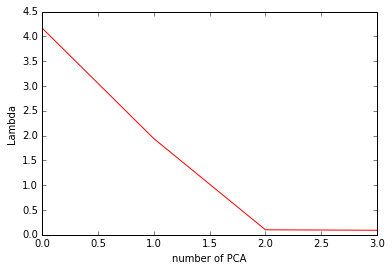

as we can see in the graph, we only need the first and second PCs to represeent the data well


In [6]:
# (b)
# first we chose a subset: complete data except outliers
outliers = []
for i in range(pca4.shape[0]) :
    if (abs(pca4[i][2]) > 10 or abs(pca4[i][3]) > 10) :
        outliers.append(i)
        
pca4_subset = np.delete(pca4, outliers, axis=0)

pca4_sub_centerd = pca4_subset - pca4_subset.mean(0)

pca4_sub_cov = np.cov(pca4_sub_centerd.T)

val_sub, vec_sub = np.linalg.eig(pca4_sub_cov)

line = plt.plot(val_sub, color='r')
plt.xlabel('number of PCA')
plt.ylabel('Lambda')
plt.show()
print "as we can see in the graph, we only need the first and second PCs to represeent the data well"

In [7]:
# (c)
# E matrix of eigenvectors
pca4_centerd = pca4 - pca4.mean(0)

pca4_cov = np.cov(pca4_centerd.T)

val_pca4, vec_pca4 = np.linalg.eig(pca4_cov)

# eigenvalues and vector are sorted
E = vec_pca4.copy()

# eigenvalues
D = np.diag(val_pca4)

Z = (pca4_centerd.dot(E)).dot(np.diag(1/np.sqrt(val_pca4)))

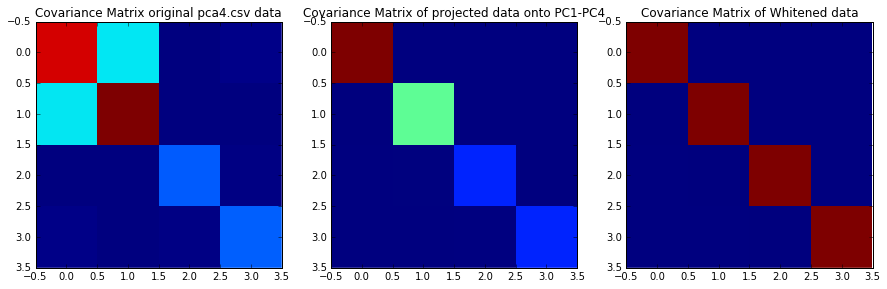

In [8]:
# (d) Make 3 heat-plots of the 
#    (i) 4x4 covariance matrix E, 
#    (ii) the covariance matrix of the data projected onto PC1-PC4, and
#    (iii) of the whitened variables.

proj = pca4.dot(vec_pca4)
proj_cov = np.cov(proj.T)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(pca4_cov, interpolation='none')
ax1.set_title("Covariance Matrix original pca4.csv data")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(proj_cov, interpolation='none')
ax2.set_title("Covariance Matrix of projected data onto PC1-PC4")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(np.cov(Z.T), interpolation='none')
ax3.set_title("Covariance Matrix of Whitened data")
plt.show()

## 4.3 Kernel PCA: Toy Data
1. Create a toy dataset of 2-dimensional data points $\ldots$ 

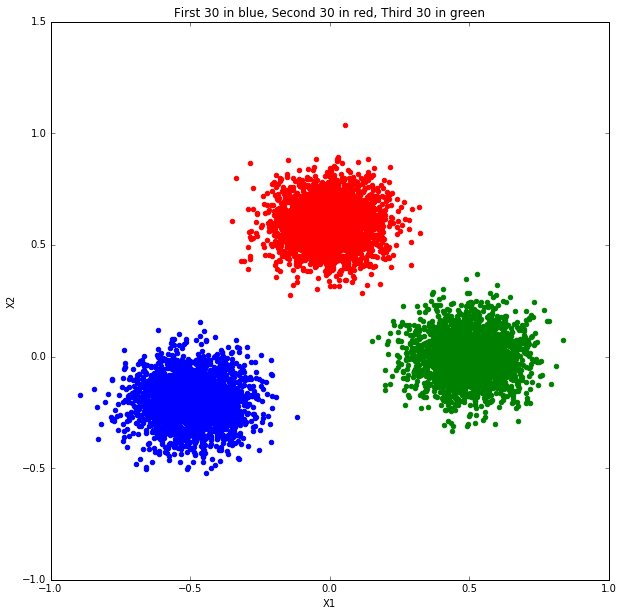

In [9]:
data = np.zeros((2,90))
dataVis = np.zeros((2,7500))
# center: (-0.5, -0.2)
data[0,0:30] = np.random.normal(-0.5, 0.1, 30)
data[1,0:30] = np.random.normal(-0.2, 0.1, 30)
dataVis[0,0:2500] = np.random.normal(-0.5, 0.1, 2500)
dataVis[1,0:2500] = np.random.normal(-0.2, 0.1, 2500)

# center: (0.0, 0.1)
data[0,30:60] = np.random.normal(0.0, 0.1, 30)
data[1,30:60] = np.random.normal(0.6, 0.1, 30)
dataVis[0,2500:5000] = np.random.normal(0.0, 0.1, 2500)
dataVis[1,2500:5000] = np.random.normal(0.6, 0.1, 2500)

# center: (-0.5, -0.2)
data[0,60:90] = np.random.normal(0.5, 0.1, 30)
data[1,60:90] = np.random.normal(0.0, 0.1, 30)
dataVis[0,5000:7500] = np.random.normal(0.5, 0.1, 2500)
dataVis[1,5000:7500] = np.random.normal(0.0, 0.1, 2500)

plt.figure(figsize=(10,10))
plt.scatter(dataVis[0,0:2500],dataVis[1,0:2500], color='b')
plt.scatter(dataVis[0,2500:5000],dataVis[1,2500:5000], color='r')
plt.scatter(dataVis[0,5000:7500],dataVis[1,5000:7500], color='g')
ax = plt.gca()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('First 30 in blue, Second 30 in red, Third 30 in green')
plt.show()